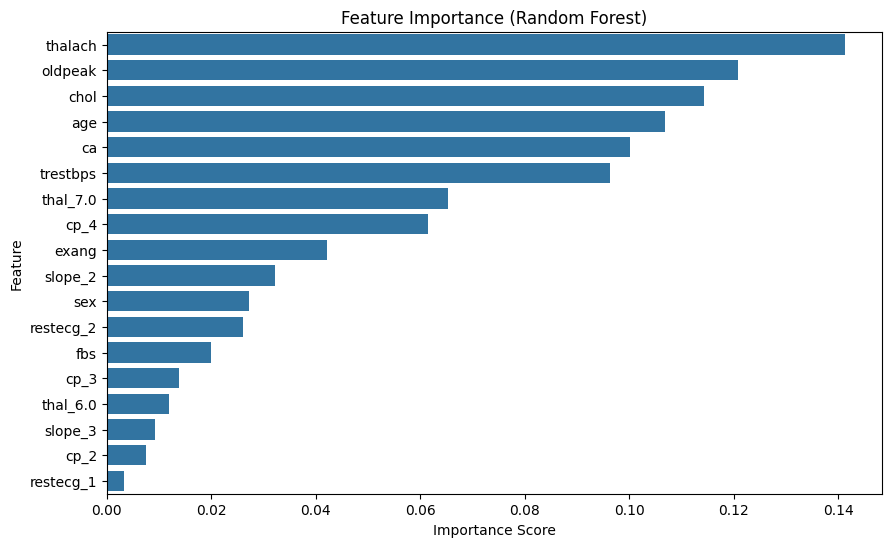


Random Forest Feature Importance Ranking:
thalach      0.141267
oldpeak      0.120864
chol         0.114252
age          0.106924
ca           0.100147
trestbps     0.096349
thal_7.0     0.065347
cp_4         0.061500
exang        0.042150
slope_2      0.032221
sex          0.027128
restecg_2    0.026038
fbs          0.020032
cp_3         0.013894
thal_6.0     0.011924
slope_3      0.009153
cp_2         0.007510
restecg_1    0.003299
dtype: float64

RFE Selected Features:
Index(['fbs', 'oldpeak', 'ca', 'cp_4', 'restecg_2', 'slope_2', 'thal_6.0',
       'thal_7.0'],
      dtype='object')

Chi-Square Selected Features:
Index(['exang', 'oldpeak', 'ca', 'cp_2', 'cp_3', 'cp_4', 'slope_2',
       'thal_7.0'],
      dtype='object')

Final Selected Features for Modeling:
{'thal_7.0', 'thalach', 'cp_2', 'thal_6.0', 'chol', 'cp_4', 'slope_2', 'fbs', 'trestbps', 'ca', 'restecg_2', 'exang', 'oldpeak', 'age', 'cp_3'}

✅ Reduced dataset saved to data/selected_features.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# 1. Load cleaned dataset
df = pd.read_csv("../data/cleaned_heart.csv")

# Separate features and target
X = df.drop("num", axis=1)
y = df["num"]

# 2. Feature Importance (Random Forest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\nRandom Forest Feature Importance Ranking:")
print(feature_importance)

# 3. Recursive Feature Elimination (RFE)
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=8)  # keep top 8 features
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
print("\nRFE Selected Features:")
print(selected_features_rfe)

# 4. Chi-Square Test
# Chi2 requires non-negative features → use MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(chi2, k=8)  # keep top 8 features
chi2_selector.fit(X_scaled, y)

selected_features_chi2 = X.columns[chi2_selector.get_support()]
print("\nChi-Square Selected Features:")
print(selected_features_chi2)


# 5. Final Selected Features
# Combine results from all methods
final_selected = set(selected_features_rfe).union(set(selected_features_chi2)).union(set(feature_importance.head(8).index))

print("\nFinal Selected Features for Modeling:")
print(final_selected)

# Save reduced dataset
selected_df = df[list(final_selected) + ["num"]]
selected_df.to_csv("../data/selected_features.csv", index=False)

